# <center> CORONA VIRUS OUTBREAK ANALYSIS </center>

## Import Required Libraries

In [17]:
!pip install folium

In [18]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import json
from geopy.geocoders import Nominatim
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import geojson
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

## Load the Data into a Dataframe

In [19]:
df = pd.read_csv('https://covid.ourworldindata.org/data/full_data.csv')
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


## Processing the Dataframe

In [20]:
df = df.dropna(axis = 0)
df = df.reset_index()
df.drop(columns = {'index', 'date', 'new_cases', 'new_deaths'}, inplace = True)
df.head()

,location,total_cases,total_deaths
0,Albania,38,1.0
1,Albania,42,1.0
2,Albania,51,1.0
3,Algeria,25,1.0
4,Algeria,26,2.0


In [21]:
df = df.groupby(['location']).sum()
df.drop(index = {'World'}, axis = 0, inplace = True)
df = df.reset_index()
df.head()

,location,total_cases,total_deaths
0,Albania,131,3.0
1,Algeria,197,13.0
2,Argentina,291,13.0
3,Australia,1988,41.0
4,Austria,3395,6.0


### Create a Dataframe for the Countries with Latitude and Longitude Values

In [22]:
d = {'location': ['Andorra','United Arab Emirates','Afghanistan','Antigua and Barbuda','Anguilla','Albania','Armenia','Netherlands Antilles','Angola','Antarctica','Argentina','American Samoa','Austria','Australia','Aruba','Azerbaijan','Bosnia and Herzegovina','Barbados','Bangladesh','Belgium','Burkina Faso','Bulgaria','Bahrain','Burundi','Benin','Bermuda','Brunei','Bolivia','Brazil','Bahamas','Bhutan','Bouvet Island','Botswana','Belarus','Belize','Canada','Cocos [Keeling] Islands','Congo [DRC]','Central African Republic','Congo [Republic]','Switzerland','CÃ´te d''Ivoire','Cook Islands','Chile','Cameroon','China','Colombia','Costa Rica','Cuba','Cape Verde','Christmas Island','Cyprus','Czech Republic','Germany','Djibouti','Denmark','Dominica','Dominican Republic','Algeria','Ecuador','Estonia','Egypt','Western Sahara','Eritrea','Spain','Ethiopia','Finland','Fiji','Falkland Islands [Islas Malvinas]','Micronesia','Faroe Islands','France','Gabon','UK','Grenada','Georgia','French Guiana','Guernsey','Ghana','Gibraltar','Greenland','Gambia','Guinea','Guadeloupe','Equatorial Guinea','Greece','South Georgia and the South Sandwich Islands','Guatemala','Guam','Guinea-Bissau','Guyana','Gaza Strip','Hong Kong','Heard Island and McDonald Islands','Honduras','Croatia','Haiti','Hungary','Indonesia','Ireland','Israel','Isle of Man','India','British Indian Ocean Territory','Iraq','Iran','Iceland','Italy','Jersey','Jamaica','Jordan','Japan','Kenya','Kyrgyzstan','Cambodia','Kiribati','Comoros','Saint Kitts and Nevis','North Korea','South Korea','Kuwait','Cayman Islands','Kazakhstan','Laos','Lebanon','Saint Lucia','Liechtenstein','Sri Lanka','Liberia','Lesotho','Lithuania','Luxembourg','Latvia','Libya','Morocco','Monaco','Moldova','Montenegro','Madagascar','Marshall Islands','Macedonia [FYROM]','Mali','Myanmar [Burma]','Mongolia','Macau','Northern Mariana Islands','Martinique','Mauritania','Montserrat','Malta','Mauritius','Maldives','Malawi','Mexico','Malaysia','Mozambique','Namibia','New Caledonia','Niger','Norfolk Island','Nigeria','Nicaragua','Netherlands','Norway','Nepal','Nauru','Niue','New Zealand','Oman','Panama','Peru','French Polynesia','Papua New Guinea','Philippines','Pakistan','Poland','Saint Pierre and Miquelon','Pitcairn Islands','Puerto Rico','Palestinian Territories','Portugal','Palau','Paraguay','Qatar','RÃ©union','Romania','Serbia','Russia','Rwanda','Saudi Arabia','Solomon Islands','Seychelles','Sudan','Sweden','Singapore','Saint Helena','Slovenia','Svalbard and Jan Mayen','Slovakia','Sierra Leone','San Marino','Senegal','Somalia','Suriname','SÃ£o TomÃ© and PrÃ­ncipe','El Salvador','Syria','Swaziland','Turks and Caicos Islands','Chad','French Southern Territories','Togo','Thailand','Tajikistan','Tokelau','Timor-Leste','Turkmenistan','Tunisia','Tonga','Turkey','Trinidad and Tobago','Tuvalu','Taiwan','Tanzania','Ukraine','Uganda','US','Uruguay','Uzbekistan','Vatican City','Saint Vincent and the Grenadines','Venezuela','British Virgin Islands','U.S. Virgin Islands','Vietnam','Vanuatu','Wallis and Futuna','Samoa','Kosovo','Yemen','Mayotte','South Africa','Zambia','Zimbabwe'],
     'Latitude': [42.546245,23.424076,33.93911,17.060816,18.220554,41.153332,40.069099,12.226079,-11.202692,-75.250973,-38.416097,-14.270972,47.516231,-25.274398,12.52111,40.143105,43.915886,13.193887,23.684994,50.503887,12.238333,42.733883,25.930414,-3.373056,9.30769,32.321384,4.535277,-16.290154,-14.235004,25.03428,27.514162,-54.423199,-22.328474,53.709807,17.189877,56.130366,-12.164165,-4.038333,6.611111,-0.228021,46.818188,7.539989,-21.236736,-35.675147,7.369722,35.86166,4.570868,9.748917,21.521757,16.002082,-10.447525,35.126413,49.817492,51.165691,11.825138,56.26392,15.414999,18.735693,28.033886,-1.831239,58.595272,26.820553,24.215527,15.179384,40.463667,9.145,61.92411,-16.578193,-51.796253,7.425554,61.892635,46.227638,-0.803689,55.378051,12.262776,42.315407,3.933889,49.465691,7.946527,36.137741,71.706936,13.443182,9.945587,16.995971,1.650801,39.074208,-54.429579,15.783471,13.444304,11.803749,4.860416,31.354676,22.396428,-53.08181,15.199999,45.1,18.971187,47.162494,-0.789275,53.41291,31.046051,54.236107,20.593684,-6.343194,33.223191,32.427908,64.963051,41.87194,49.214439,18.109581,30.585164,36.204824,-0.023559,41.20438,12.565679,-3.370417,-11.875001,17.357822,40.339852,35.907757,29.31166,19.513469,48.019573,19.85627,33.854721,13.909444,47.166,7.873054,6.428055,-29.609988,55.169438,49.815273,56.879635,26.3351,31.791702,43.750298,47.411631,42.708678,-18.766947,7.131474,41.608635,17.570692,21.913965,46.862496,22.198745,17.33083,14.641528,21.00789,16.742498,35.937496,-20.348404,3.202778,-13.254308,23.634501,4.210484,-18.665695,-22.95764,-20.904305,17.607789,-29.040835,9.081999,12.865416,52.132633,60.472024,28.394857,-0.522778,-19.054445,-40.900557,21.512583,8.537981,-9.189967,-17.679742,-6.314993,12.879721,30.375321,51.919438,46.941936,-24.703615,18.220833,31.952162,39.399872,7.51498,-23.442503,25.354826,-21.115141,45.943161,44.016521,61.52401,-1.940278,23.885942,-9.64571,-4.679574,12.862807,60.128161,1.352083,-24.143474,46.151241,77.553604,48.669026,8.460555,43.94236,14.497401,5.152149,3.919305,0.18636,13.794185,34.802075,-26.522503,21.694025,15.454166,-49.280366,8.619543,15.870032,38.861034,-8.967363,-8.874217,38.969719,33.886917,-21.178986,38.963745,10.691803,-7.109535,23.69781,-6.369028,48.379433,1.373333,37.09024,-32.522779,41.377491,41.902916,12.984305,6.42375,18.420695,18.335765,14.058324,-15.376706,-13.768752,-13.759029,42.602636,15.552727,-12.8275,-30.559482,-13.133897,-19.015438],
     'Longitude': [1.601554,53.847818,67.709953,-61.796428,-63.068615,20.168331,45.038189,-69.060087,17.873887,-0.071389,-63.616672,-170.132217,14.550072,133.775136,-69.968338,47.576927,17.679076,-59.543198,90.356331,4.469936,-1.561593,25.48583,50.637772,29.918886,2.315834,-64.75737,114.727669,-63.588653,-51.92528,-77.39628,90.433601,3.413194,24.684866,27.953389,-88.49765,-106.346771,96.870956,21.758664,20.939444,15.827659,8.227512,-5.54708,-159.777671,-71.542969,12.354722,104.195397,-74.297333,-83.753428,-77.781167,-24.013197,105.690449,33.429859,15.472962,10.451526,42.590275,9.501785,-61.370976,-70.162651,1.659626,-78.183406,25.013607,30.802498,-12.885834,39.782334,-3.74922,40.489673,25.748151,179.414413,-59.523613,150.550812,-6.911806,2.213749,11.609444,-3.435973,-61.604171,43.356892,-53.125782,-2.585278,-1.023194,-5.345374,-42.604303,-15.310139,-9.696645,-62.067641,10.267895,21.824312,-36.587909,-90.230759,144.793731,-15.180413,-58.93018,34.308825,114.109497,73.504158,-86.241905,15.2,-72.285215,19.503304,113.921327,-8.24389,34.851612,-4.548056,78.96288,71.876519,43.679291,53.688046,-19.020835,12.56738,-2.13125,-77.297508,36.238414,138.252924,37.906193,74.766098,104.990963,-168.734039,43.872219,-62.782998,127.510093,127.766922,47.481766,-80.566956,66.923684,102.495496,35.862285,-60.978893,9.555373,80.771797,-9.429499,28.233608,23.881275,6.129583,24.603189,17.228331,-7.09262,7.412841,28.369885,19.37439,46.869107,171.184478,21.745275,-3.996166,95.956223,103.846656,113.543873,145.38469,-61.024174,-10.940835,-62.187366,14.375416,57.552152,73.22068,34.301525,-102.552784,101.975766,35.529562,18.49041,165.618042,8.081666,167.954712,8.675277,-85.207229,5.291266,8.468946,84.124008,166.931503,-169.867233,174.885971,55.923255,-80.782127,-75.015152,-149.406843,143.95555,121.774017,69.345116,19.145136,-56.27111,-127.439308,-66.590149,35.233154,-8.224454,134.58252,-58.443832,51.183884,55.536384,24.96676,21.005859,105.318756,29.873888,45.079162,160.156194,55.491977,30.217636,18.643501,103.819836,-10.030696,14.995463,23.670272,19.699024,-11.779889,12.457777,-14.452362,46.199616,-56.027783,6.613081,-88.89653,38.996815,31.465866,-71.797928,18.732207,69.348557,0.824782,100.992541,71.276093,-171.855881,125.727539,59.556278,9.537499,-175.198242,35.243322,-61.222503,177.64933,120.960515,34.888822,31.16558,32.290275,-95.712891,-55.765835,64.585262,12.453389,-61.287228,-66.58973,-64.639968,-64.896335,108.277199,166.959158,-177.156097,-172.104629,20.902977,48.516388,45.166244,22.937506,27.849332,29.154857]
    }
df2 = pd.DataFrame(data = d)
df2.head()

,location,Latitude,Longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


### Merge the Two Created Dataframes

In [23]:
df3 = df.merge(df2, on = 'location', how = 'right').dropna(axis = 0)
df3.head()

,location,total_cases,total_deaths,Latitude,Longitude
0,Albania,131.0,3.0,41.153332,20.168331
1,Algeria,197.0,13.0,28.033886,1.659626
2,Argentina,291.0,13.0,-38.416097,-63.616672
3,Australia,1988.0,41.0,-25.274398,133.775136
4,Austria,3395.0,6.0,47.516231,14.550072


## Create a Geojson File from the Dataframe for Plotting the Map

In [8]:
def df_to_geojson(df, properties, lat = 'Latitude', lon = 'Longitude'):
    """
    Turn a dataframe containing point data into a geojson formatted python dictionary
    
    df : the dataframe to convert to geojson
    properties : a list of columns in the dataframe to turn into geojson feature properties
    lat : the name of the column in the dataframe that contains latitude data
    lon : the name of the column in the dataframe that contains longitude data
    """
    
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

cols = ['location', 'total_cases']
geo_df = df_to_geojson(df3, properties = cols)
#geo_df

## Create the Map with Markers set on the Mentioned Countries

In [9]:
world_map = folium.Map(zoom_start = 2, tiles = 'Stamen Terrain')
folium.Choropleth(geo_data = geo_df, data = df3, columns = ['location', 'total_cases'], key_on = 'feature.properties.location', fill_color = 'YlOrRd', legend_name = 'Corona Virus Impact').add_to(world_map)
folium.LayerControl().add_to(world_map)
world_map

### Plot the Required Bar Graphs

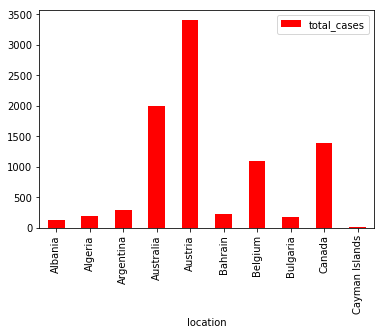

In [10]:
df3.head(10).plot(kind = 'bar', x = 'location', y = 'total_cases', color = 'red')
plt.show()

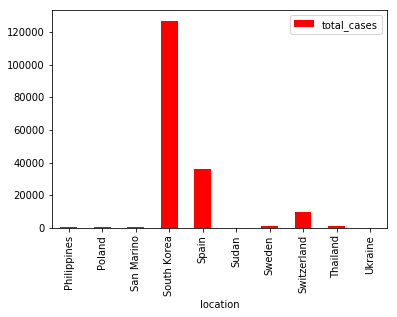

In [11]:
df3.tail(10).plot(kind = 'bar', x = 'location', y = 'total_cases', color = 'red')
plt.show()

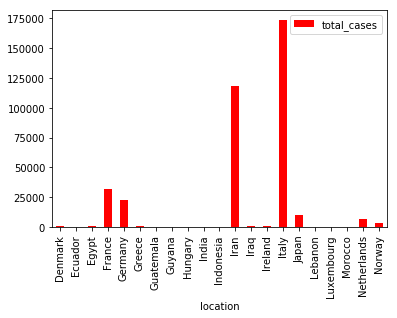

In [12]:
df3.loc[11:31].plot(kind = 'bar', x = 'location', y = 'total_cases', color = 'red')
plt.show()